In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from bofire.data_models.constraints.api import (
    NonlinearEqualityConstraint,
    NonlinearInequalityConstraint,
    LinearEqualityConstraint,
    LinearInequalityConstraint,
)
from bofire.data_models.domain.api import Domain
from bofire.data_models.features.api import ContinuousInput, ContinuousOutput
from bofire.strategies.doe.design import find_local_max_ipopt

/home/aaron/anaconda3/envs/doe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


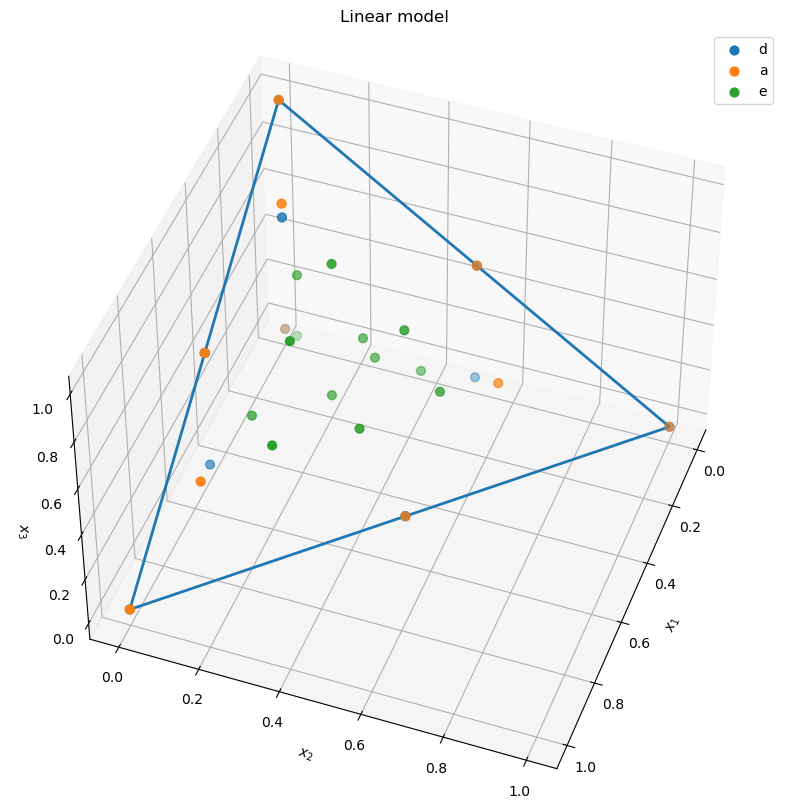

In [17]:
domain = Domain(
    input_features=[ContinuousInput(key=f"x{i+1}", bounds=(0,1)) for i in range(3)],
    output_features=[ContinuousOutput(key="y")],
    constraints=[LinearInequalityConstraint(features=["x1","x2","x3"], coefficients=[1,1,1], rhs=1)]
)



fig = plt.figure(figsize=((10,10)))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 45)
ax.set_title("Linear model")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.rcParams["figure.figsize"] = (10,8)


#plot feasible polytope
ax.plot(
    xs=[0, 0, 1, 0],
    ys=[0, 1, 0, 0],
    zs=[1, 0, 0, 1],
    linewidth=2
)

for obj in ["d", "a", "e"]:
    res = find_local_max_ipopt(domain, model_type="fully-quadratic", n_experiments=13, objective=obj, ipopt_options={"maxiter":300}).to_numpy()

    ax.scatter(
        xs=res[:,0],
        ys=res[:,1],
        zs=res[:,2],
        marker="o",
        s=40,
        label=obj
    )

plt.legend()

ax.view_init(45,20)

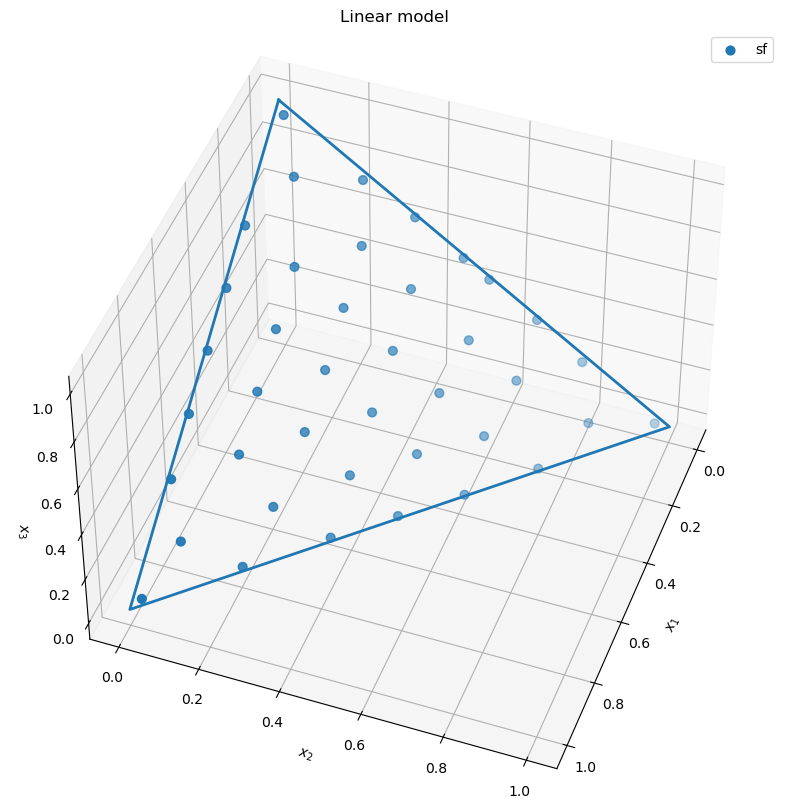

In [20]:
domain = Domain(
    input_features=[ContinuousInput(key=f"x{i+1}", bounds=(0,1)) for i in range(3)],
    output_features=[ContinuousOutput(key="y")],
    constraints=[LinearEqualityConstraint(features=["x1","x2","x3"], coefficients=[1,1,1], rhs=1)]
)



fig = plt.figure(figsize=((10,10)))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 45)
ax.set_title("Linear model")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.rcParams["figure.figsize"] = (10,8)


#plot feasible polytope
ax.plot(
    xs=[0, 0, 1, 0],
    ys=[0, 1, 0, 0],
    zs=[1, 0, 0, 1],
    linewidth=2
)

for obj in ["sf"]:
    res = find_local_max_ipopt(domain, model_type="linear", n_experiments=40, objective=obj, ipopt_options={"maxiter":500}).to_numpy()

    ax.scatter(
        xs=res[:,0],
        ys=res[:,1],
        zs=res[:,2],
        marker="o",
        s=40,
        label=obj
    )

plt.legend()

ax.view_init(45,20)